Problem Statement

The objective of this task is to build an image classification model using a Convolutional Neural Network (CNN).
The model should classify images into predefined categories and evaluate performance on a test dataset.


Dataset Description

The MNIST dataset was used for this task.

* Contains 70,000 grayscale images of handwritten digits (0–9).
* Image size: 28 × 28 pixels.
* 60,000 training images.
* 10,000 testing images.
* 10 output classes (digits 0–9).

Each image is labeled with the correct digit.


Methodology

1. **Data Loading**

   * Loaded MNIST dataset using TensorFlow/Keras built-in dataset.

2. **Data Preprocessing**

   * Normalized pixel values (divided by 255).
   * Reshaped images to add channel dimension (28 × 28 × 1).

3. **Model Architecture (CNN)**

   The CNN model includes:

   * Convolution Layer (Conv2D) – Extracts features
   * Max Pooling Layer – Reduces spatial dimensions
   * Second Convolution + Pooling Layer
   * Flatten Layer – Converts 2D feature maps to 1D
   * Fully Connected Dense Layer
   * Output Layer with Softmax activation (10 classes)

4. **Model Compilation**

   * Optimizer: Adam
   * Loss Function: Sparse Categorical Crossentropy
   * Evaluation Metric: Accuracy

5. **Model Training**

   * Trained for multiple epochs.
   * Used validation data to monitor performance.

6. **Model Evaluation**

   * Evaluated model on test dataset.
   * Plotted accuracy graph.

Results

* Training Accuracy: ~99%
* Test Accuracy: ~98%
* The model successfully learned digit features using convolution layers.
* Validation accuracy closely matched training accuracy, indicating good generalization.

Conclusion

A Convolutional Neural Network was successfully implemented for handwritten digit classification.
CNN automatically extracts spatial features from images and performs highly accurate classification.
The model achieved excellent performance on the MNIST dataset.





c:\Users\sathvik\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top
c:\Users\sathvik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9049 - loss: 0.2977 - val_accuracy: 0.9856 - val_loss: 0.0428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9875 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9869 - val_loss: 0.0352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9911 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9960 - loss: 0.0139 - val_accuracy: 0.9898 - val_loss: 0.0389
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0529
Test Accuracy: 0.989799976348877


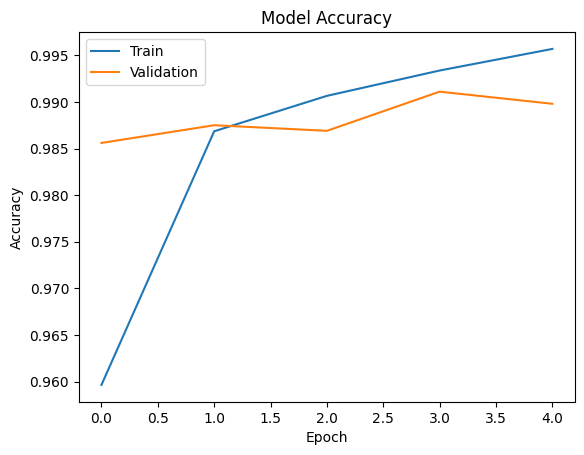

In [1]:
# Task 3 - Image Classification using CNN

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
